In [22]:
%pip install seaborn
%pip install kneed


In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
import scipy


In [24]:
df=pd.read_csv('data.csv', encoding='unicode_escape')

In [25]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [26]:
print(df.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [27]:
df.tail

<bound method NDFrame.tail of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerI

In [28]:
df.shape

(541909, 8)

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [30]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [31]:
df = df.dropna()

In [32]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [34]:
# convert date column to datetime format
df.loc[:, 'Date'] = pd.to_datetime(df['InvoiceDate'])


In [40]:
# keep only the most recent date of purchase
df.loc[df['CustomerID'] == 123, 'rank'] = (
    df.sort_values(['CustomerID', 'Date'])
    .groupby(['CustomerID'])['Date']
    .rank(method='min')
    .astype(int))


In [41]:
df_rec = df[df['rank']==1]

In [44]:
df_rec.loc[:, 'recency'] = (df_rec['Date'] - pd.to_datetime(min(df_rec['Date']))).dt.days


In [46]:
freq = df_rec.groupby('CustomerID')['Date'].count()
df_freq = pd.DataFrame(freq).reset_index()
df_freq.columns = ['CustomerID','frequency']

In [47]:
rec_freq = df_freq.merge(df_rec,on='CustomerID')

In [61]:
rec_freq

,CustomerID,frequency,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Date,rank,recency,total
0,12346.0,1,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,United Kingdom,2011-01-18 10:01:00,1,48,189248.25
1,12347.0,31,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,12/7/2010 14:57,2.10,Iceland,2010-12-07 14:57:00,1,6,40.68
2,12347.0,31,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,12/7/2010 14:57,4.25,Iceland,2010-12-07 14:57:00,1,6,11.00
3,12347.0,31,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,12/7/2010 14:57,3.25,Iceland,2010-12-07 14:57:00,1,6,40.68
4,12347.0,31,537626,22492,MINI PAINT SET VINTAGE,36,12/7/2010 14:57,0.65,Iceland,2010-12-07 14:57:00,1,6,122.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100805,18287.0,29,554065,85040A,S/4 PINK FLOWER CANDLES IN BOWL,36,5/22/2011 10:39,1.65,United Kingdom,2011-05-22 10:39:00,1,172,70.20
100806,18287.0,29,554065,85039B,S/4 IVORY MINI ROSE CANDLE IN BOWL,60,5/22/2011 10:39,1.45,United Kingdom,2011-05-22 10:39:00,1,172,153.00
100807,18287.0,29,554065,85039B,S/4 IVORY MINI ROSE CANDLE IN BOWL,12,5/22/2011 10:39,1.65,United Kingdom,2011-05-22 10:39:00,1,172,30.60
100808,18287.0,29,554065,85040A,S/4 PINK FLOWER CANDLES IN BOWL,12,5/22/2011 10:39,1.65,United Kingdom,2011-05-22 10:39:00,1,172,19.80


In [51]:
rec_freq['total'] = rec_freq['Quantity']*df['UnitPrice']
m = rec_freq.groupby('CustomerID')['total'].sum()
m = pd.DataFrame(m).reset_index()
m.columns = ['CustomerID','monetary_value']

In [52]:
rfm = m.merge(rec_freq,on='CustomerID')

In [53]:
finaldf = rfm[['CustomerID','recency','frequency','monetary_value']]

recency: 


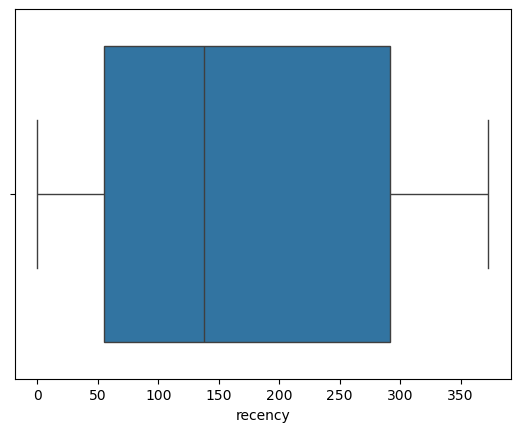

frequency: 


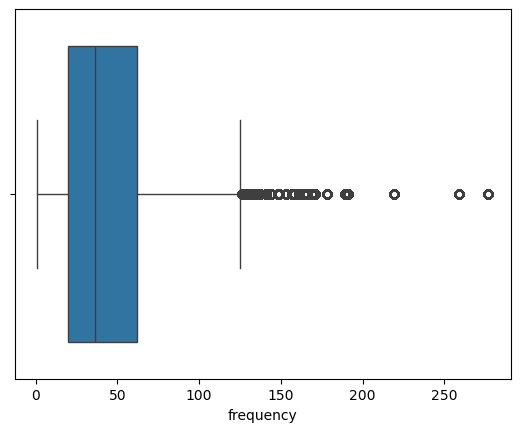

monetary_value: 


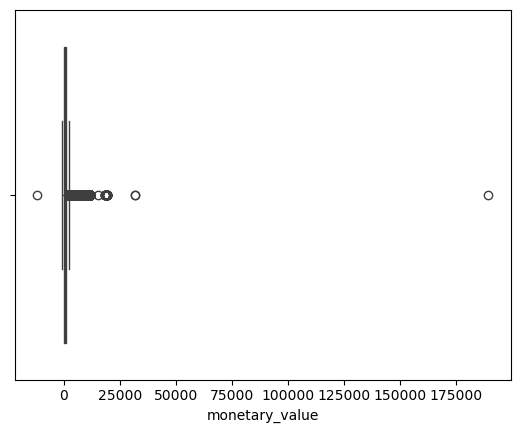

In [54]:
list1 = ['recency','frequency','monetary_value']
for i in list1:
    print(str(i)+': ')
    ax = sns.boxplot(x=finaldf[str(i)])
    plt.show()

In [56]:
from scipy import stats
# remove the customer id column
new_df = finaldf[['recency','frequency','monetary_value']]
# remove outliers
z_scores = stats.zscore(new_df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = new_df[filtered_entries]

In [58]:
new_df=pd.DataFrame(new_df)

In [60]:
new_df

,recency,frequency,monetary_value
1,6,31,1246.73
2,6,31,1246.73
3,6,31,1246.73
4,6,31,1246.73
5,6,31,1246.73
...,...,...,...
100805,172,29,863.40
100806,172,29,863.40
100807,172,29,863.40
100808,172,29,863.40


In [62]:
new_df = new_df.drop_duplicates()
col_names = ['recency', 'frequency', 'monetary_value']
features = new_df[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)

In [63]:
scaled_features

,recency,frequency,monetary_value
0,-1.218090,0.373556,1.217075
1,-1.141854,-0.272658,5.792435
2,1.738198,2.312198,1.772477
3,-0.735258,-0.272658,0.181922
4,-0.616668,-0.364974,0.770581
...,...,...,...
4190,-0.455724,-0.595764,-0.300904
4191,0.365938,-0.734239,-0.506150
4192,0.823358,-0.734239,-0.405214
4193,-0.963968,1.573668,-0.343073


***Customer Segmentation Models***

Text(0, 0.5, 'Inertia')

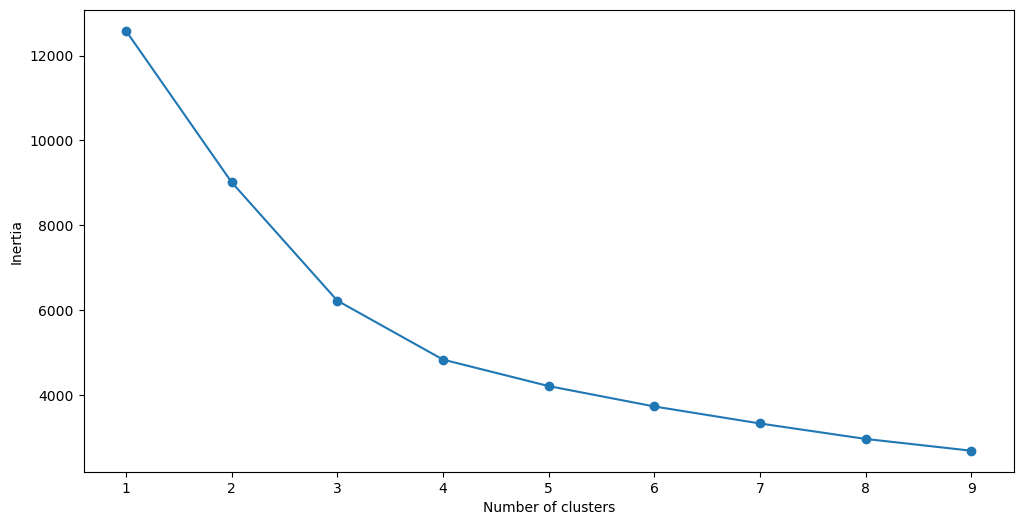

In [64]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(scaled_features)
    SSE.append(kmeans.inertia_)
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [65]:
# First, build a model with 4 clusters
kmeans = KMeans( n_clusters = 4, init='k-means++')
kmeans.fit(scaled_features)

KMeans(n_clusters=4)

In [66]:
print(silhouette_score(scaled_features, kmeans.labels_, metric='euclidean'))

0.4033412086006656


***Segmentation Model Interpretation and Visualization***

In [67]:
pred = kmeans.predict(scaled_features)
frame = pd.DataFrame(new_df)
frame['cluster'] = pred

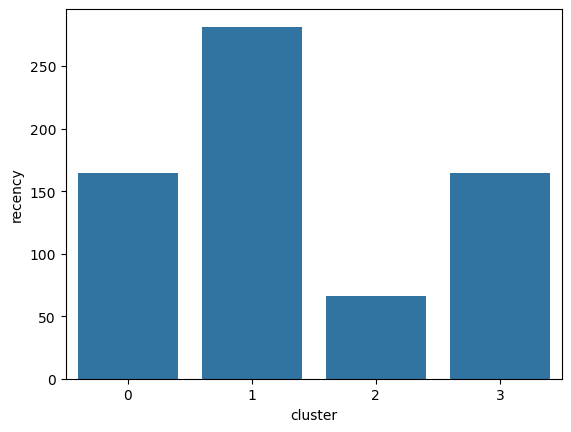

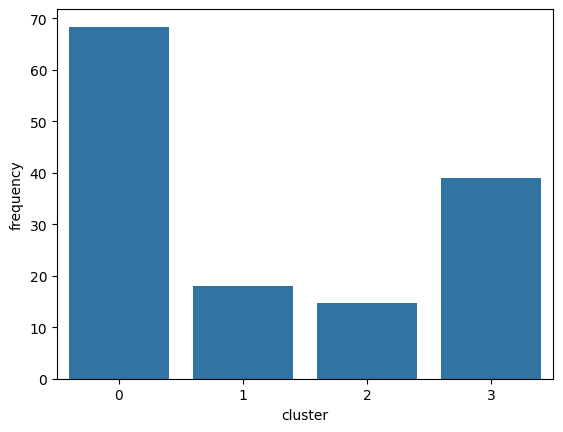

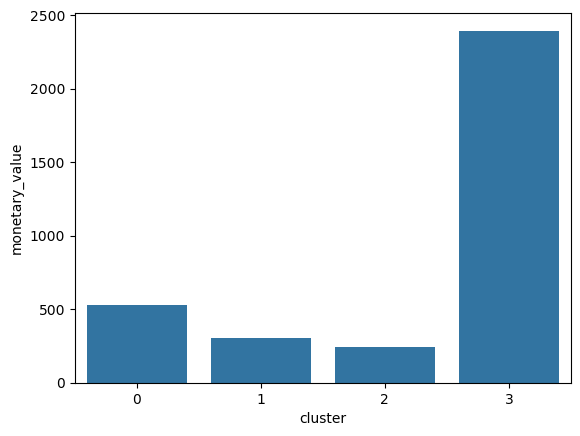

In [68]:
avg_df = frame.groupby(['cluster'], as_index=False).mean()
for i in list1:
    sns.barplot(x='cluster',y=str(i),data=avg_df)
    plt.show()